In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("archive (1)/Reviews.csv",nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [33]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [35]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

In [ ]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hits(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [ ]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18) 
score_2 = reviews[reviews['Score'] == 2].sample(n=18) 
score_3 = reviews[reviews['Score'] == 3].sample(n=18) 
score_4 = reviews[reviews['Score'] = 4].sample(n=18) 
score_5 = reviews[reviews['Score'] == 5].sample(n=18) 

In [ ]:
reviews_sample = pd.concat([score_1,score_2,score_ 3,score_4,score_5],axis=0) 
reviews_sample.reset_index(drop=True,inplace=True) 
print(reviews_sample.groupby('Score').count().ld) 

In [ ]:
pip install textblob

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import pandas as pd
import nltk
nltk.download('stopwords')
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(df['Text'].head())

In [6]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]
negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summart.str.cat()


NameError: name 'reviews_sample' is not defined

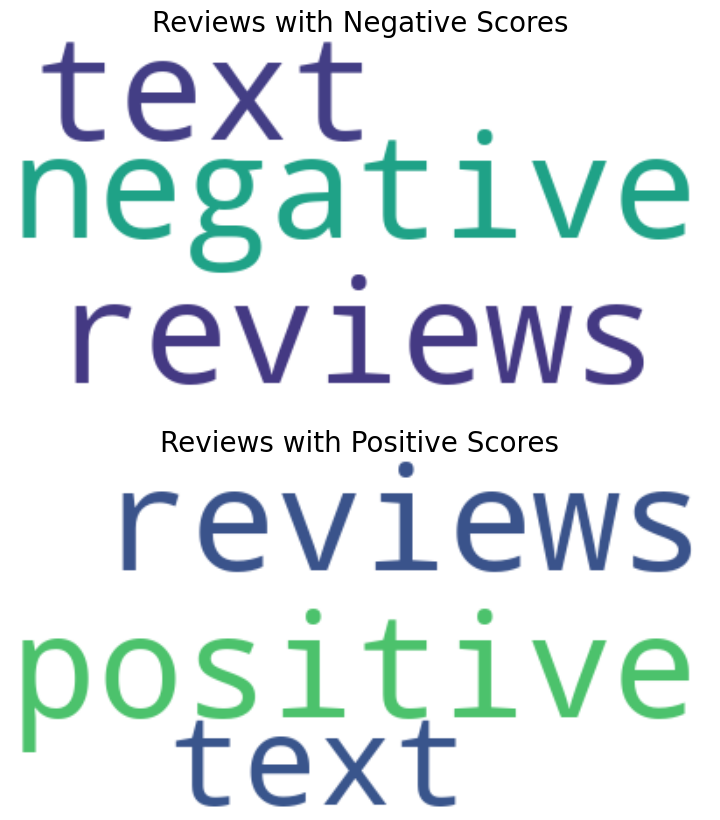

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
negative_reviews_str = "your negative reviews text here"
positive_reviews_str = "your positive reviews text here"
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)

plt.show()

In [10]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 960.0 kB/s eta 0:00:01
   ----- ----

In [26]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Set the style for matplotlib plots
plt.style.use('fivethirtyeight')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming df is your DataFrame and it has a column named 'Text'
# Check if there are any missing values in the 'Text' column and handle them
df['Text'].fillna('', inplace=True)  # Replace NaN values with empty strings

# Generating sentiment for all the sentences present in the dataset
emptyline = []
for row in df['Text']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)

# Add the sentiment scores to the DataFrame
df['Sentiment'] = emptyline

# Expand the 'Sentiment' dictionary into separate columns
df = df.join(df['Sentiment'].apply(pd.Series))

# Visualize the distribution of the compound sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=30, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

NameError: name 'df' is not defined

In [24]:
pip install vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ---------------------------------------  122.9/126.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 820.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
